 # PREDICTING CRIME RATE IN CHICAGO USING FACEBOOK PROPHET 


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
par_dir=os.path.abspath(os.path.pardir)
file_path=os.path.join(par_dir,'data','raw','CrimeRate')
df_2004=pd.read_csv(os.path.join(file_path,'Chicago_Crimes_2001_to_2004.csv'),error_bad_lines=False)
df_2007=pd.read_csv(os.path.join(file_path,'Chicago_Crimes_2005_to_2007.csv'),error_bad_lines=False)
df_2011=pd.read_csv(os.path.join(file_path,'Chicago_Crimes_2008_to_2011.csv'),error_bad_lines=False)
df_2017=pd.read_csv(os.path.join(file_path,'Chicago_Crimes_2012_to_2017.csv'),error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Chaitra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
final_df=pd.concat([df_2004,df_2007,df_2011,df_2017])

In [110]:
final_df.drop(columns=['Updated On'],axis=1,inplace=True)
final_df.drop(columns=['Beat','Location','Unnamed: 0','ID','Case Number','Ward','FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude'],axis=1,inplace=True)

final_df.head() 

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year
Date1,,,,,,,,,,
2004-01-01 00:01:00,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,46.0,2004.0
2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,61.0,2003.0
2004-06-20 11:00:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,22.0,2004.0
2004-12-30 20:00:00,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,25.0,20.0,2004.0
2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,22.0,49.0,2003.0


In [10]:
final_df.head(5)

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,46.0,2004.0
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,61.0,2003.0
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,22.0,2004.0
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,25.0,20.0,2004.0
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,22.0,49.0,2003.0


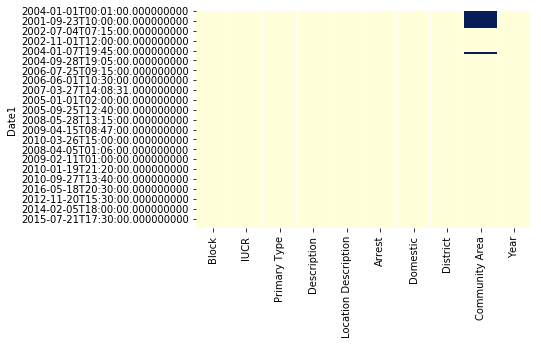

In [98]:
sns.heatmap(final_df.isnull(),cmap='YlGnBu',cbar=False)

In [12]:
final_df['Date1']=pd.to_datetime(final_df['Date'],format='%m/%d/%Y %I:%M:%S %p')

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 1456713
Data columns (total 12 columns):
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
Community Area          float64
Year                    float64
Date1                   datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(3), object(6)
memory usage: 681.6+ MB


In [21]:
final_df.set_index('Date1')
#final_df.drop(columns='Date',axis=1,inplace=True)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year
Date1,,,,,,,,,,
2004-01-01 00:01:00,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,46.0,2004.0
2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,61.0,2003.0
2004-06-20 11:00:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,22.0,2004.0
2004-12-30 20:00:00,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,25.0,20.0,2004.0
2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,22.0,49.0,2003.0
2004-08-01 00:01:00,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False,10.0,29.0,2004.0
2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,5.0,50.0,2001.0
2003-03-15 00:00:00,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,22.0,73.0,2003.0
2004-09-16 10:00:00,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,18.0,8.0,2004.0


In [22]:
final_df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Date1
0,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,46.0,2004.0,2004-01-01 00:01:00
1,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,61.0,2003.0,2003-03-01 00:00:00
2,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,22.0,2004.0,2004-06-20 11:00:00
3,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,25.0,20.0,2004.0,2004-12-30 20:00:00
4,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,22.0,49.0,2003.0,2003-05-01 01:00:00


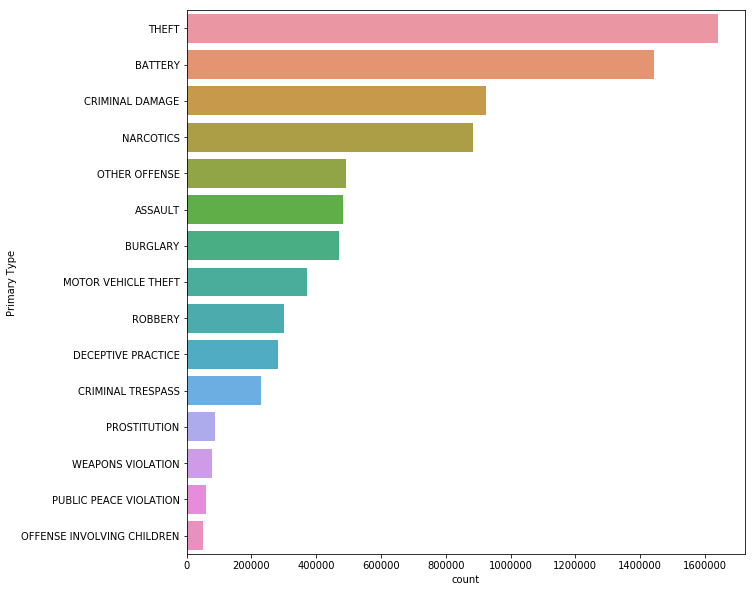

In [42]:
fig=plt.figure(figsize=(10,10))
sns.countplot(data=final_df,y='Primary Type', order=final_df['Primary Type'].value_counts().iloc[:15].index)

In [48]:
#final_df=final_df.set_index('Date1')
final_df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year
Date1,,,,,,,,,,
2004-01-01 00:01:00,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,46.0,2004.0
2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,61.0,2003.0
2004-06-20 11:00:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,22.0,2004.0
2004-12-30 20:00:00,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,25.0,20.0,2004.0
2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,22.0,49.0,2003.0


In [67]:
final_df['Location Description'].value_counts().iloc[:15].index

Index(['STREET', 'RESIDENCE', 'SIDEWALK', 'APARTMENT', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING',
       'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'SMALL RETAIL STORE',
       'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'GROCERY FOOD STORE',
       'DEPARTMENT STORE'],
      dtype='object')

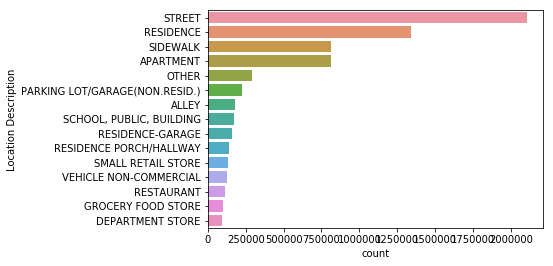

In [68]:
sns.countplot(y='Location Description',data=final_df,order=final_df['Location Description'].value_counts().iloc[:15].index)

In [53]:
final_df.resample('Y').size()

Date1
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0.5,1,'Quarter wise crime count')

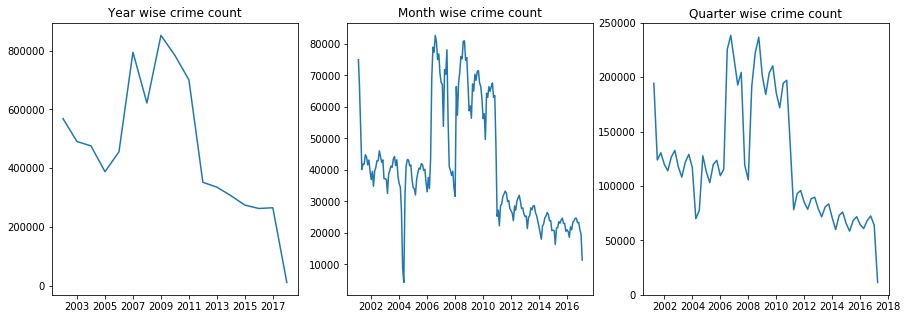

In [64]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(final_df.resample('Y').size())
ax[0].set_title('Year wise crime count')
ax[1].plot(final_df.resample('M').size())
ax[1].set_title('Month wise crime count')
ax[2].plot(final_df.resample('Q').size())
ax[2].set_title('Quarter wise crime count')

In [31]:
final_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1640506
BATTERY                       1442716
CRIMINAL DAMAGE                923000
NARCOTICS                      885431
OTHER OFFENSE                  491922
ASSAULT                        481661
BURGLARY                       470958
MOTOR VEHICLE THEFT            370548
ROBBERY                        300453
DECEPTIVE PRACTICE             280931
CRIMINAL TRESPASS              229366
PROSTITUTION                    86401
WEAPONS VIOLATION               77429
PUBLIC PEACE VIOLATION          58548
OFFENSE INVOLVING CHILDREN      51441
Name: Primary Type, dtype: int64

In [86]:
prophet_df=final_df.resample('M').size().reset_index()

In [ ]:
from fbprophet import Prophet
m=Prophet()

In [88]:
prophet_df.columns=['X','Y']

In [89]:
prophet_df

,X,Y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
5,2001-06-30,41823
6,2001-07-31,44801
7,2001-08-31,44115
8,2001-09-30,41602
9,2001-10-31,43131


In [90]:
prophet_df.rename(columns={'X':'ds','Y':'y'},inplace=True)

In [100]:
from fbprophet import Prophet


In [106]:
m=Prophet()

m.fit(prophet_df)
future=m.make_future_dataframe(periods=720)
forecast=m.predict(future)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Chaitra\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [107]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40566.629556,22802.257796,54824.028741,40566.629556,40566.629556,-1575.734232,-1575.734232,-1575.734232,-1575.734232,-1575.734232,-1575.734232,0.0,0.0,0.0,38990.895324
1,2001-02-28,40713.928301,18957.343546,50738.339918,40713.928301,40713.928301,-6454.460910,-6454.460910,-6454.460910,-6454.460910,-6454.460910,-6454.460910,0.0,0.0,0.0,34259.467390
2,2001-03-31,40877.009054,23049.437320,54104.715232,40877.009054,40877.009054,-2068.126492,-2068.126492,-2068.126492,-2068.126492,-2068.126492,-2068.126492,0.0,0.0,0.0,38808.882561
3,2001-04-30,41034.829137,24325.954910,55925.998735,41034.829137,41034.829137,-1473.320415,-1473.320415,-1473.320415,-1473.320415,-1473.320415,-1473.320415,0.0,0.0,0.0,39561.508722
4,2001-05-31,41197.909890,29145.106235,62434.749054,41197.909890,41197.909890,3883.120316,3883.120316,3883.120316,3883.120316,3883.120316,3883.120316,0.0,0.0,0.0,45081.030206
5,2001-06-30,41355.729974,29066.797113,61092.543133,41355.729974,41355.729974,3174.847751,3174.847751,3174.847751,3174.847751,3174.847751,3174.847751,0.0,0.0,0.0,44530.577725
6,2001-07-31,41518.810727,29948.262604,61323.844546,41518.810727,41518.810727,4523.913896,4523.913896,4523.913896,4523.913896,4523.913896,4523.913896,0.0,0.0,0.0,46042.724622
7,2001-08-31,41681.891485,30221.926603,61330.918433,41681.891485,41681.891485,4051.863709,4051.863709,4051.863709,4051.863709,4051.863709,4051.863709,0.0,0.0,0.0,45733.755193
8,2001-09-30,41839.711573,26137.871840,58844.709576,41839.711573,41839.711573,1212.558370,1212.558370,1212.558370,1212.558370,1212.558370,1212.558370,0.0,0.0,0.0,43052.269943
9,2001-10-31,42002.792330,28469.764164,60321.848473,42002.792330,42002.792330,1819.375000,1819.375000,1819.375000,1819.375000,1819.375000,1819.375000,0.0,0.0,0.0,43822.167330


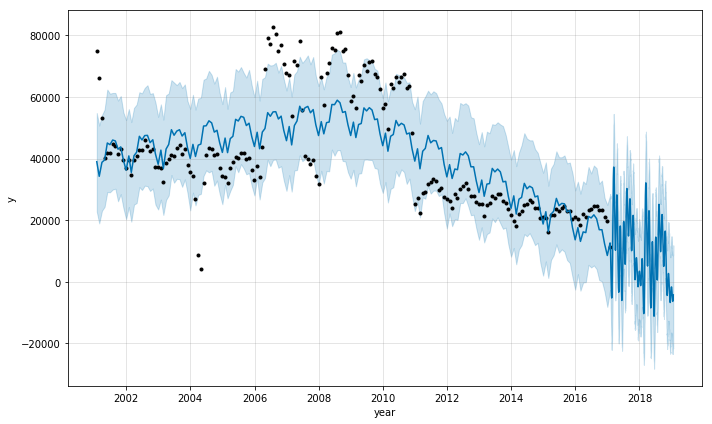

In [108]:
figure=m.plot(forecast,xlabel='year')


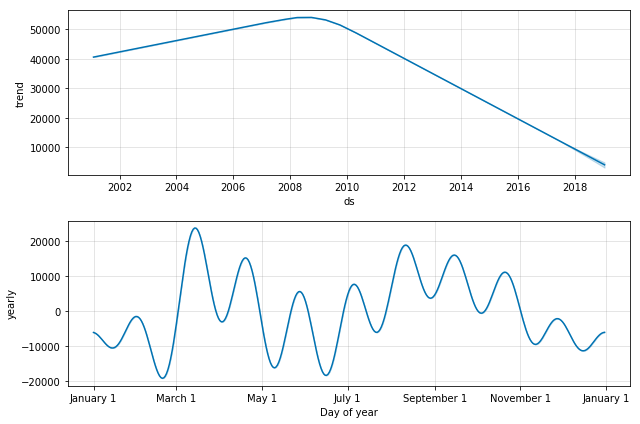

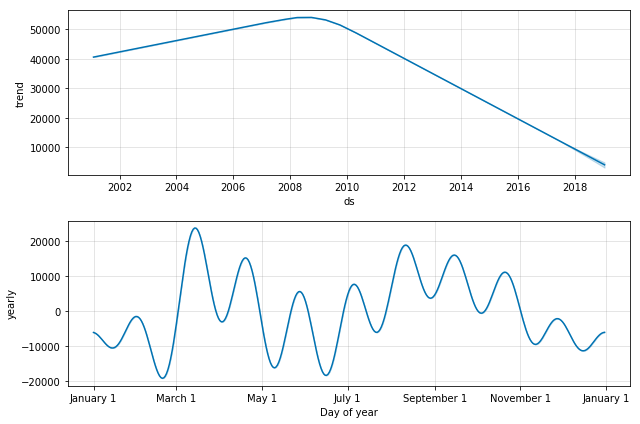

In [109]:
m.plot_components(forecast)